**Load Dataset & Convert Date Column**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


**Filter One Store & One Item**


In [17]:
df_filtered = df[(df['store'] == 1) & (df['item'] == 1)]

df_filtered.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


**Set Date as Index**

In [18]:
df_filtered = df_filtered.set_index('date')
df_filtered = df_filtered.sort_index()

df_filtered.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


**Aggregate Sales by Month**

In [6]:
monthly_sales = df_filtered['sales'].resample('M').sum()

monthly_sales.head()

/tmp/ipython-input-1848749706.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_filtered['sales'].resample('M').sum()


,sales
date,
2013-01-31,328
2013-02-28,322
2013-03-31,477
2013-04-30,522
2013-05-31,531


**Plot Sales Trend**

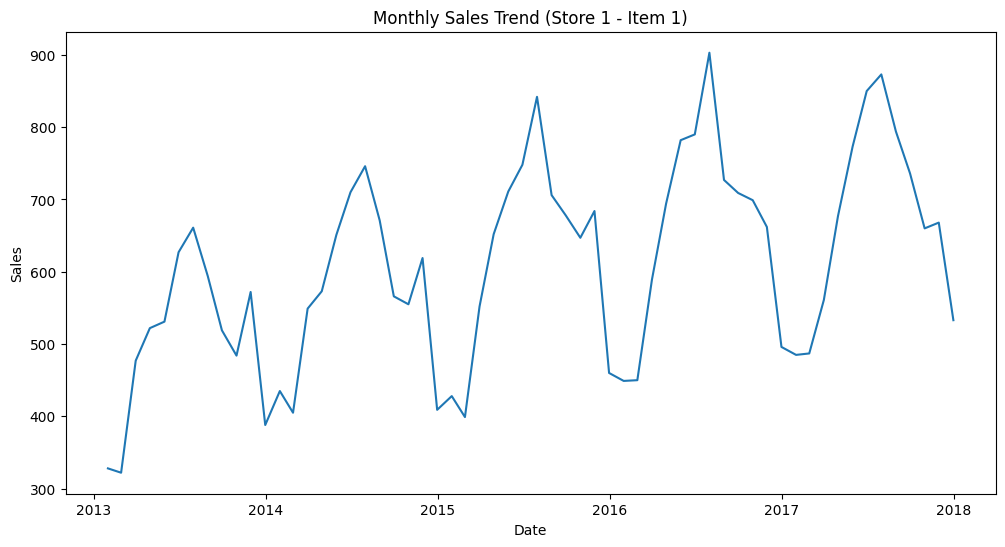

In [7]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend (Store 1 - Item 1)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

**Check Seasonality Using Rolling Mean**

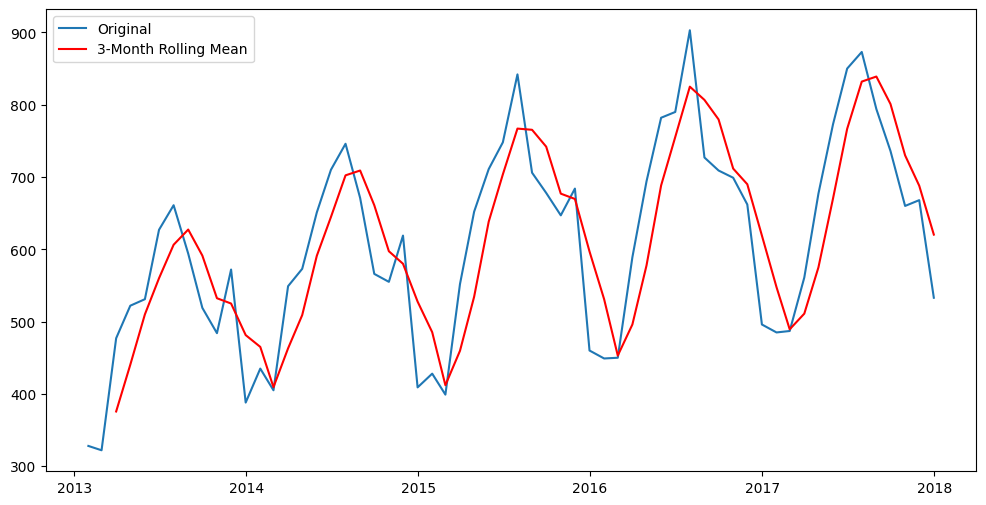

In [8]:
rolling_mean = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Original")
plt.plot(rolling_mean, label="3-Month Rolling Mean", color='red')
plt.legend()
plt.show()

**Train Test Split**

In [9]:
train = monthly_sales[:-6]
test = monthly_sales[-6:]

**Fit Exponential Smoothing Model**

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train,
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)

fit_model = model.fit()
forecast = fit_model.forecast(6)

**Plot Forecast**

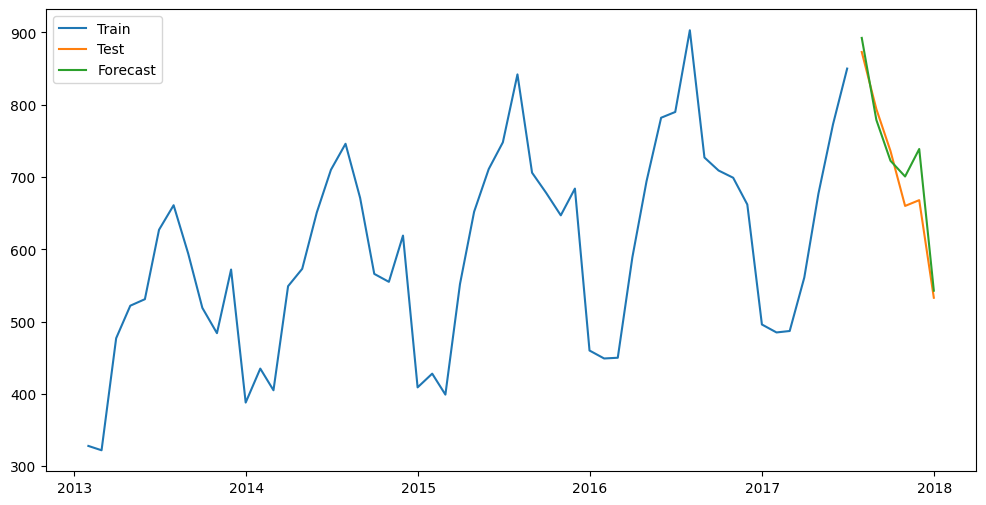

In [11]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

**Calculate Error Metrics (MAE & MAPE)**


In [12]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("MAPE:", mape)

MAE: 28.21158497376007
MAPE: 4.09264661191128


**Export Forecast to CSV**

In [13]:
forecast_df = pd.DataFrame({
    "Actual": test,
    "Forecast": forecast
})
forecast_df.to_csv("forecast_results.csv")